In [ ]:
# Install required package
!pip install kagglehub
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print(" Libraries ready")

 Libraries ready


In [ ]:
# Download dataset from Kaggle

path = kagglehub.dataset_download("rovnez/fc-26-fifa-26-player-data")

print(" Dataset downloaded to:", path)

Using Colab cache for faster access to the 'fc-26-fifa-26-player-data' dataset.
 Dataset downloaded to: /kaggle/input/fc-26-fifa-26-player-data


In [ ]:
# Load dataset

df = pd.read_csv(path + '/FC26_20250921.csv', low_memory=False)

df.head()


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,174500000,320000,22,2003-06-29,186,75,53.0,La Liga,1.0,243.0,Real Madrid,CAM,5.0,NaN,2023-07-01,2029.0,14,England,1318.0,CAM,10.0,Right,4,4,5,NaN,Normal (170-185),Yes,370800000.0,"#Dribbler, #Playmaker , #Clinical finisher, #C...","Relentless +, Low Driven Shot, Gamechanger, In...",80.0,86.0,83.0,90.0,78.0,85.0,66,88,75,...,91,83,86,85,94,80,87,85,82,91,90,74,90,77,79,77,14,11,10,5,8,NaN,86+3,86+3,86+3,87+0,89+0,89+0,89+0,87+0,89+3,89+3,89+3,87+3,89+3,89+3,89+3,87+3,83+3,85+3,85+3,85+3,83+3,82+3,81+3,81+3,81+3,82+3,18+3,https://cdn.sofifa.net/players/252/371/26_120.png
1,239053,/player/239053/federico-valverde/260004/,26,4,2025-09-19,F. Valverde,Federico Santiago Valverde Dipetta,"CM, CDM, RB",89,90,120500000,340000,26,1998-07-22,182,74,53.0,La Liga,1.0,243.0,Real Madrid,RDM,8.0,NaN,2016-07-22,2029.0,60,Uruguay,NaN,NaN,NaN,Right,4,3,4,NaN,Unique,Yes,256100000.0,"#Playmaker , #Distance shooter, #Tackling , #T...","Relentless +, Power Shot, Long Ball Pass, Inte...",88.0,84.0,84.0,84.0,83.0,85.0,78,80,63,...,89,68,91,82,93,82,91,81,86,86,86,59,84,82,87,86,6,10,6,15,8,NaN,84+3,84+3,84+3,85+0,86+0,86+0,86+0,85+0,86+3,86+3,86+3,86+3,88+2,88+2,88+2,86+3,86+3,87+3,87+3,87+3,86+3,86+3,83+3,83+3,83+3,86+3,18+3,https://cdn.sofifa.net/players/239/053/26_120.png
2,212622,/player/212622/joshua-kimmich/260004/,26,4,2025-09-19,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,89,86000000,140000,30,1995-02-08,177,75,19.0,Bundesliga,1.0,21.0,FC Bayern München,RDM,6.0,NaN,2015-07-01,2029.0,21,Germany,1337.0,RCM,6.0,Right,4,3,4,NaN,Normal (170-185),Yes,141900000.0,"#Playmaker , #Crosser, #Tackling , #Complete m...","Long Ball Pass +, Finesse Shot, Whipped Pass, ...",72.0,74.0,89.0,84.0,83.0,79.0,92,68,72,...,89,84,78,77,92,69,83,89,85,78,86,71,86,82,86,85,8,15,7,15,15,NaN,77+3,77+3,77+3,82+0,81+0,81+0,81+0,82+0,83+3,83+3,83+3,84+3,87+2,87+2,87+2,84+3,86+3,87+2,87+2,87+2,86+3,85+3,82+3,82+3,82+3,85+3,21+3,https://cdn.sofifa.net/players/212/622/26_120.png
3,235212,/player/235212/achraf-hakimi/260004/,26,4,2025-09-19,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,"RB, RM",89,90,111000000,170000,26,1998-11-04,181,73,16.0,Ligue 1,1.0,73.0,Paris Saint-Germain,RB,2.0,NaN,2021-07-06,2029.0,129,Morocco,111111.0,RB,2.0,Right,4,4,4,NaN,Lean (170-185),Yes,213700000.0,#Speedster,"Relentless +, Low Driven Shot, Whipped Pass, J...",92.0,79.0,82.0,83.0,82.0,79.0,85,80,71,...,90,78,82,84,95,72,77,77,85,84,78,68,84,82,85,79,10,8,14,6,8,NaN,82+3,82+3,82+3,84+0,84+0,84+0,84+0,84+0,83+3,83+3,83+3,85+3,83+3,83+3,83+3,85+3,86+3,83+3,83+3,83+3,86+3,86+3,81+3,81+3,81+3,86+3,17+3,https://cdn.sofifa.net/players/235/212/26_120.png
4,224232,/player/224232/nicolo-barella/26

In [ ]:
# Show sample player data
df[['short_name', 'age', 'nationality_name', 'club_name', 'overall', 'potential']].head(10)

,short_name,age,nationality_name,club_name,overall,potential
0,J. Bellingham,22,England,Real Madrid,90,94
1,F. Valverde,26,Uruguay,Real Madrid,89,90
2,J. Kimmich,30,Germany,FC Bayern München,89,89
3,A. Hakimi,26,Morocco,Paris Saint-Germain,89,90
4,N. Barella,28,Italy,Inter,87,87
5,H. Çalhanoğlu,31,Türkiye,Inter,86,86
6,F. Dimarco,27,Italy,Inter,85,85
7,A. Mac Allister,26,Argentina,Liverpool,87,88
8,Rodri,29,Spain,Manchester City,90,90
9,A. Griezmann,34,France,Atlético Madrid,85,85


In [ ]:
# Basic summary statistics
print("Total Players:", len(df))
print("Total Countries:", df['nationality_name'].nunique())
print("Total Clubs :", df['club_name'].nunique())

Total Players: 18405
Total Countries: 160
Total Clubs : 662


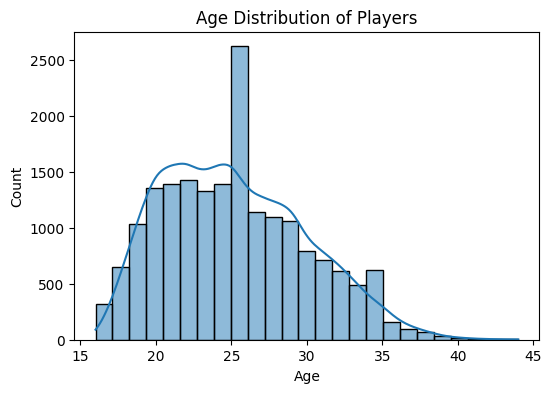

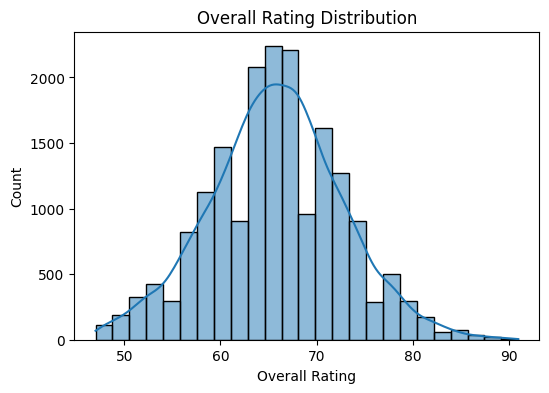

In [ ]:
# Visualize distributions (Age & Overall Rating)

plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=25, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age'); plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['overall'], bins=25, kde=True)
plt.title('Overall Rating Distribution')
plt.xlabel('Overall Rating'); plt.ylabel('Count')
plt.show()

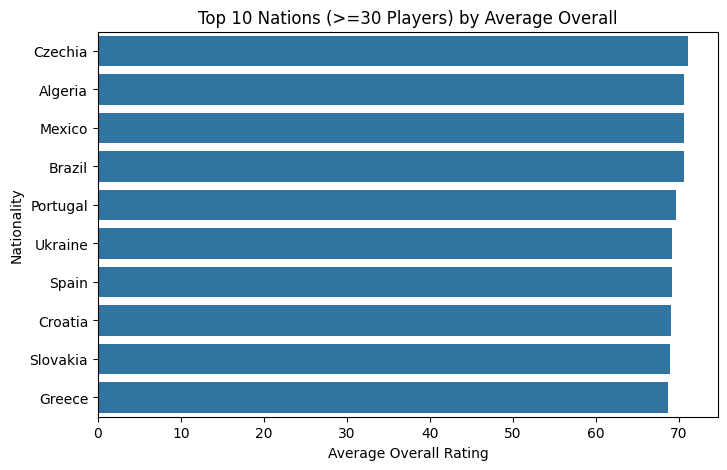

In [ ]:
# Top 10 Nations by Average Overall
top10 = df.sort_values('overall', ascending=False).head(10)[['short_name','age','nationality_name','club_name','overall','potential']]
top10
nation_mean = (
    df.groupby('nationality_name')
      .agg(avg_overall=('overall', 'mean'),
           count=('overall', 'count'))
      .query('count >= 30')
      .sort_values('avg_overall', ascending=False)
      .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x='avg_overall', y=nation_mean.index, data=nation_mean)
plt.title('Top 10 Nations (>=30 Players) by Average Overall')
plt.xlabel('Average Overall Rating'); plt.ylabel('Nationality')
plt.show()

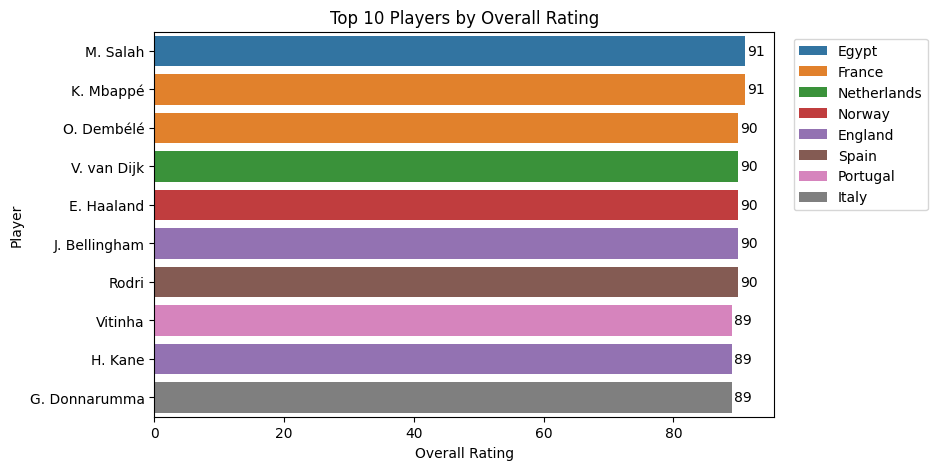

In [ ]:
# Top 10 Players by Overall Rating
plt.figure(figsize=(8,5))
sns.barplot(data=top10, x='overall', y='short_name', hue='nationality_name', dodge=False)

for index, value in enumerate(top10['overall']):
    plt.text(value+0.3, index, str(value), va='center')

plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Overall Rating'); plt.ylabel('Player')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [ ]:
# Create main position column
df['main_position'] = df['player_positions'].apply(lambda x: x.split(',')[0])
print(" 'main_position' column created successfully")

 'main_position' column created successfully


In [ ]:
# Select skill columns for analysis
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Create a smaller DataFrame with position + skills
df_skill = df[['main_position'] + skills].copy()

# Convert all to numeric in case of mixed data types
for c in skills:
    df_skill[c] = pd.to_numeric(df_skill[c], errors='coerce')

print(" Skill data ready for analysis")

 Skill data ready for analysis


In [ ]:
# Calculate average skill per position
df['gk_skill'] = df[['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
                     'goalkeeping_positioning','goalkeeping_reflexes']].mean(axis=1)

for c in skills:
    df[c] = df[c].fillna(df['gk_skill'])

df_skill = df[['main_position'] + skills].copy()
for c in skills:
    df_skill[c] = pd.to_numeric(df_skill[c], errors='coerce')

pos_skill_mean = df_skill.groupby('main_position').mean(numeric_only=True).round(1)
pos_skill_mean.head()

,pace,shooting,passing,dribbling,defending,physic
main_position,,,,,,
CAM,69.8,61.5,64.4,68.7,43.9,57.9
CB,60.3,36.1,49.7,52.8,66.0,71.3
CDM,62.1,52.6,61.8,64.1,64.1,68.7
CM,65.9,57.8,63.6,66.3,58.4,64.0
GK,63.6,63.6,63.6,63.6,63.6,63.6


In [ ]:
# Focus on key positions
main_roles = ['ST', 'CAM', 'CM', 'CDM', 'CB', 'LB', 'RB', 'GK']
pos_skill_filtered = pos_skill_mean.loc[pos_skill_mean.index.isin(main_roles)]
pos_skill_filtered

,pace,shooting,passing,dribbling,defending,physic
main_position,,,,,,
CAM,69.8,61.5,64.4,68.7,43.9,57.9
CB,60.3,36.1,49.7,52.8,66.0,71.3
CDM,62.1,52.6,61.8,64.1,64.1,68.7
CM,65.9,57.8,63.6,66.3,58.4,64.0
GK,63.6,63.6,63.6,63.6,63.6,63.6
LB,72.8,46.2,58.3,63.3,61.2,64.5
RB,72.7,45.6,57.5,62.8,61.4,65.5
ST,69.7,65.3,53.7,64.1,30.2,65.9


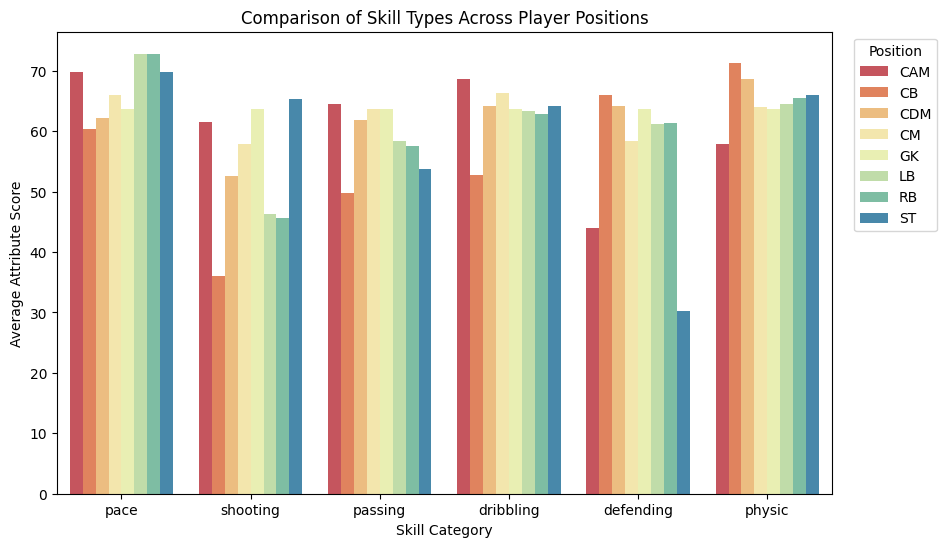

In [ ]:
# Compare skill types across positions

skill_melt = pos_skill_filtered.reset_index().melt(id_vars='main_position',
                                                   var_name='Skill',
                                                   value_name='Average Score')

plt.figure(figsize=(10,6))
sns.barplot(x='Skill', y='Average Score', hue='main_position',
            data=skill_melt, palette='Spectral')

plt.title('Comparison of Skill Types Across Player Positions')
plt.xlabel('Skill Category')
plt.ylabel('Average Attribute Score')
plt.legend(title='Position', bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()